In [112]:
# Importing required packages

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline


In [113]:
#Loading Dataset

wine=pd.read_csv(r"C:\Users\Dell\Downloads\winequality-red.csv")

In [114]:
#lets check the data

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
#Information about data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [116]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Lets do some plotting to know how data columns are distributed in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

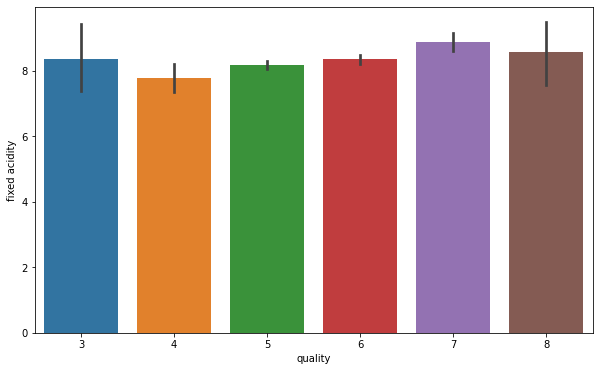

In [117]:
#Here we see that fixed acidity does not give any specification to classify the quality

fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='fixed acidity',data=wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

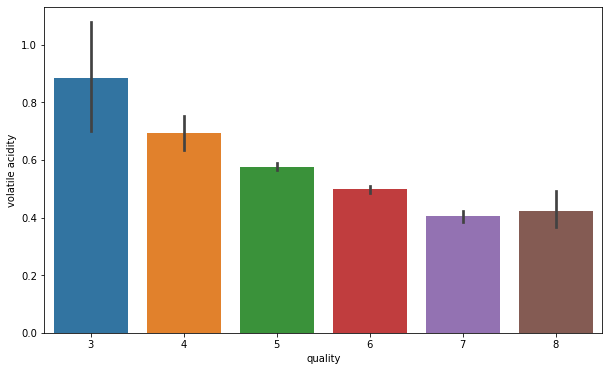

In [118]:
#Here we see that its quite a dowing trend in the volatile acidity as we go higher the quality

fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='volatile acidity',data=wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

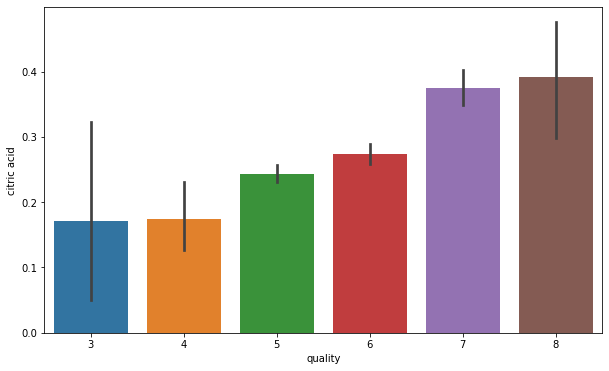

In [119]:
#Composition of the citric acid go higher as we go higher in the qualty of the wine

fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='citric acid',data=wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

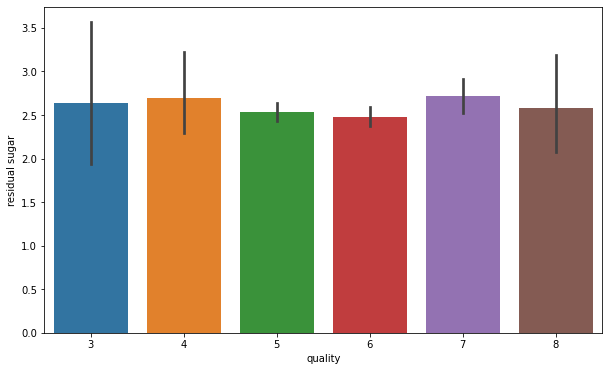

In [120]:
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

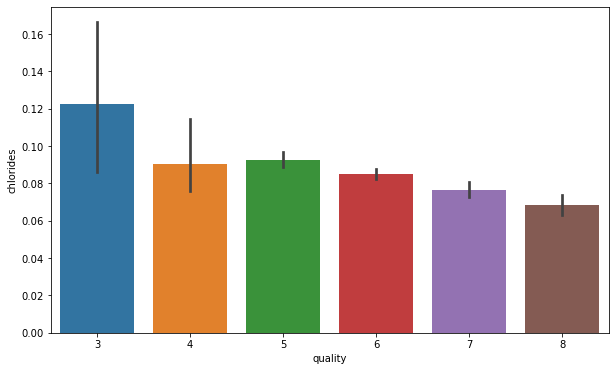

In [121]:
#compositing of chloride go down as we go higher in the quality of the wine
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='chlorides',data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

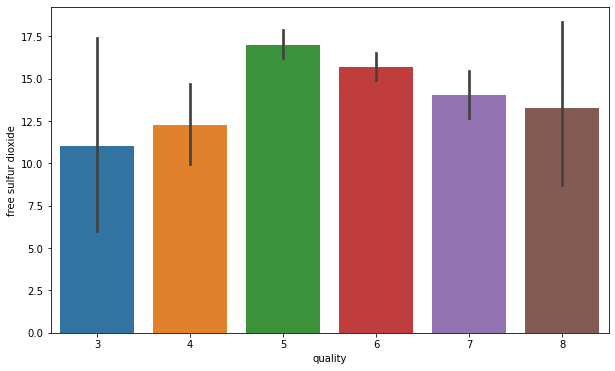

In [122]:
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

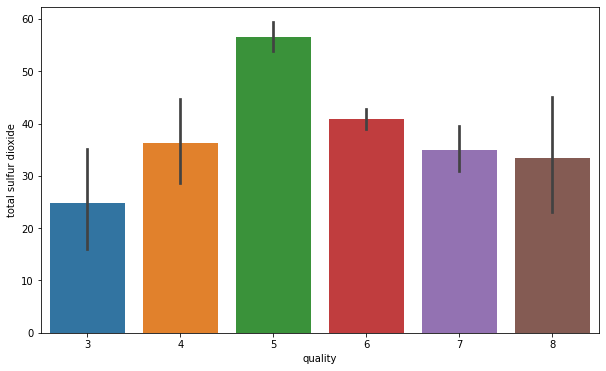

In [123]:
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

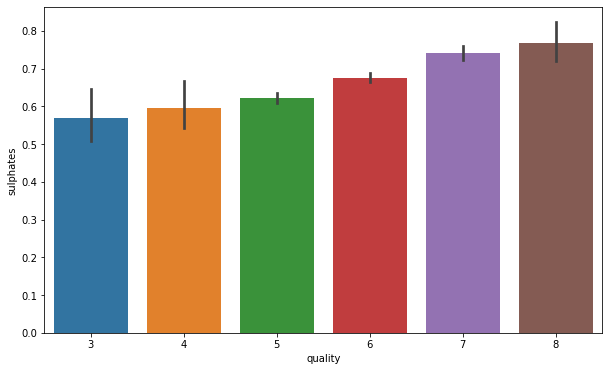

In [124]:
#Suphate level goes higher with qualty of wine
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='sulphates',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

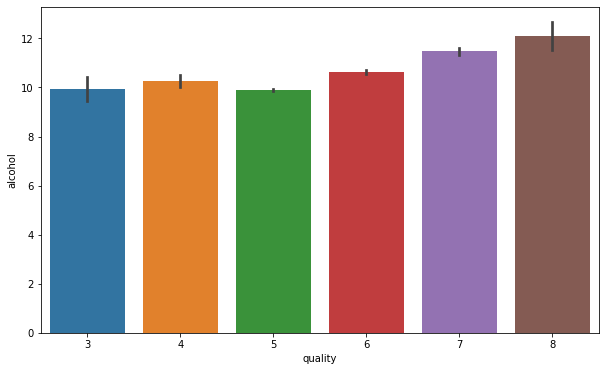

In [125]:
#Alchol level goes higher as the quality of the wine increases
fig=plt.figure(figsize=(10,6))

sns.barplot(x='quality',y='alcohol',data=wine)

Preprocessing data for ML algo

In [126]:
#making binary classification for the response varible
#dividing wine as good and bad by giivng the limint for thr quality

bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)

In [127]:
#lets assign label to qualty varaile

label_quality=LabelEncoder()

In [128]:
#bad becoms 0 and good becomes 1

wine['quality']= label_quality.fit_transform(wine['quality'])

In [129]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

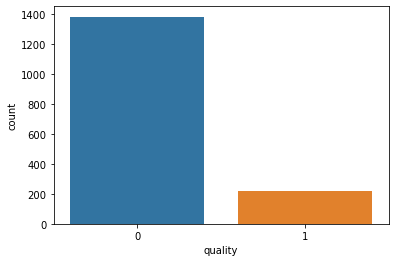

In [130]:
sns.countplot(wine['quality'])

In [131]:
#now seprating dataset as reponse and feature vaible

X=wine.drop('quality',axis=1)
y=wine['quality']

In [132]:
# Train and test spliting of data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
#applying standard scalar to get optimized reult

sc=StandardScaler()

In [134]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Our training and testing data is ready now for ML algo

# Random Forest Classifier

In [135]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [136]:
#lets see how our model performed

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.69      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.80      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



Random Forest accuracy is 87%

In [137]:
#Confusion matrix for RF

print(confusion_matrix(y_test,pred_rfc))

[[265   8]
 [ 29  18]]


# Stockhastic Gradient Decent Classifier

In [138]:
sgd=SGDClassifier(penalty=None)
sgd.fit(X_train,y_train)
pred_sgd=sgd.predict(X_test)

In [139]:
print (classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       273
           1       0.40      0.13      0.19        47

    accuracy                           0.84       320
   macro avg       0.63      0.55      0.55       320
weighted avg       0.80      0.84      0.81       320



SGDC accuracy is 81%

In [140]:
print(confusion_matrix(y_test,pred_sgd))

[[264   9]
 [ 41   6]]


# Support Vector Classifier

In [141]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)

In [142]:
print (classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



SVC Accuracy 85%

In [143]:
print(confusion_matrix(y_test,pred_svc))

[[268   5]
 [ 35  12]]


# Decision Tree classifier


In [144]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)

In [145]:
print (classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       273
           1       0.52      0.47      0.49        47

    accuracy                           0.86       320
   macro avg       0.72      0.70      0.71       320
weighted avg       0.85      0.86      0.86       320



DT accuracy 86%

In [146]:
print(confusion_matrix(y_test,pred_dt))

[[253  20]
 [ 25  22]]


Lets try to increase accuracy of models

# Grid Search CV

In [147]:
#finding best paramenters for SVC model

param={'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['linear','rbf'],'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc=GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)

In [148]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [149]:
#best parameter for svc model

grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [150]:
#lets run SVC again with best parameters

svc2=SVC(C=1.2,gamma=0.9,kernel='rbf')
svc2.fit(X_train,y_train)
pred_svc2=svc2.predict(X_test)
print(classification_report(y_test,pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 86% to 90% using grid search cv

# Cross validation score for random forest

In [151]:
# now lets try to evalute RFC using cross validation

rfc_eval=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10)
rfc_eval.mean()

0.9140194389763779

RFC accuracy increases from 73% to 91 % using Cross validation

In [152]:
Final_mod=SVC(C=1.2,gamma=0.9,kernel='rbf')
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


89.6875


# Saving the model

In [153]:
!pip install joblib
import joblib
joblib.dump(Final_mod,'Wine.pkl')


['Wine.pkl']